Choose Tutors
https://www.kaggle.com/c/choose-tutors/

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# paths
RAW_DATA_PATH = Path('./data_raw')
RAW_TRAIN_PATH = RAW_DATA_PATH / 'train.csv'

### 0. Признаки.

In [3]:
train_raw = pd.read_csv(RAW_TRAIN_PATH)
train_raw.info()
train_raw.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [4]:
# количественные признаки
NUM_FEATURE_NAMES = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'mean_exam_points']
CAT_FEATURE_NAMES = ['physics', 'chemistry', 'biology', 'english', 'geography','history']
TARGET_NAME = 'choose'

### 1. Пропуски

In [5]:
train_raw.shape

(10000, 13)

In [6]:
def show_empty_rows_count_by_feature_name(df, feature_name):
    empty_rows_count = df[df[feature_name].isna()].shape[0]
    if empty_rows_count:
        print(f'\t{feature_name}: {empty_rows_count}')

In [7]:
# NO empty values

### 2. Статистика

In [8]:
train_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8009,8.030274,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9748,1.766883,0.0,0.00,2.0,3.00,9.0
lesson_price,10000.0,1702.4400,523.789062,200.0,1300.00,1550.0,2150.00,3950.0
qualification,10000.0,1.7243,0.798845,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3706,0.482990,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1215,0.326724,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1172,0.321675,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0591,0.235824,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0277,0.164120,0.0,0.00,0.0,0.00,1.0


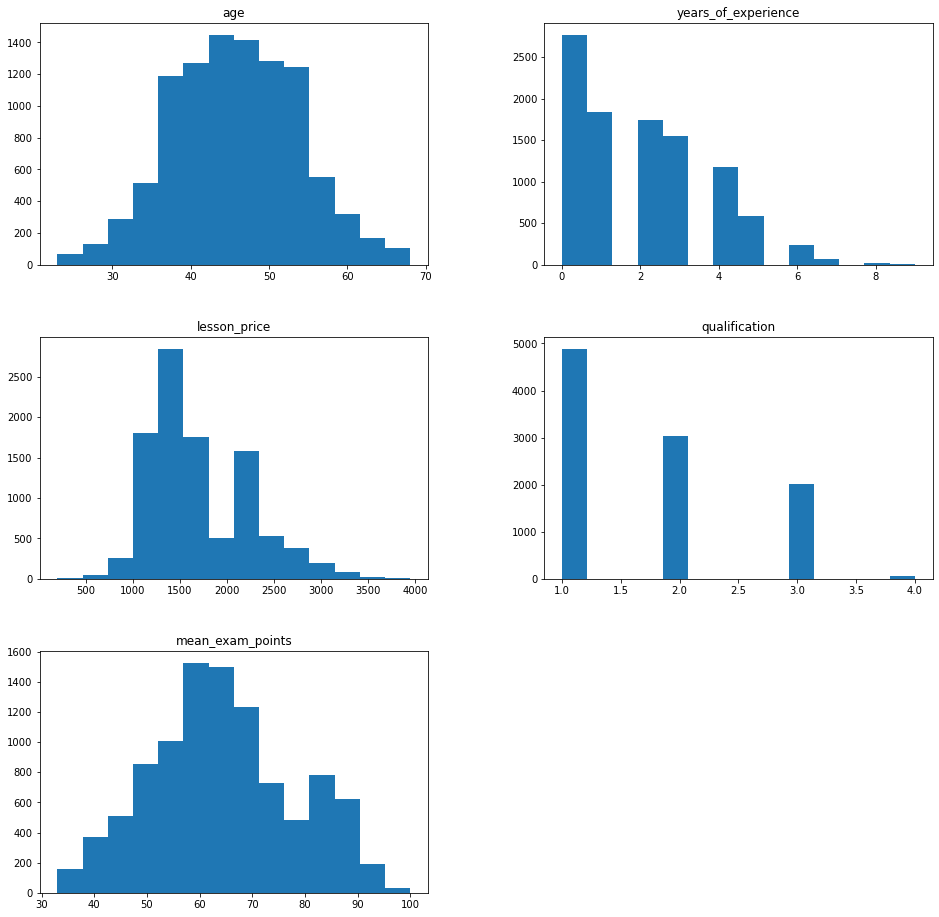

In [9]:
# гистограмма для количественных признаков
train_raw[NUM_FEATURE_NAMES].hist(figsize=(16, 16), bins=14, grid=False);

### 3. Проверить баланс классов

In [10]:
y = train_raw[TARGET_NAME]
y.value_counts()

0    8891
1    1109
Name: choose, dtype: int64

### 4. Предобработка, разбиение train/validation

In [11]:
# Путь до обработанных данных
DATA_PATH = Path('./data')
TRAIN_PATH  = DATA_PATH / 'train.csv'
TEST_PATH = DATA_PATH / 'validation.csv'

#### 4.1 Стандартизация

In [12]:
def get_scaled_df(df, num_feature_names):
    
    # стандартизация признака
    def calc_std_feat(x):
        s = (x - x.mean()) / x.std()
        return s
    
    # do-scaling-main
    df_norm = df.copy().astype(np.float64)
    for num_feature in num_feature_names:
        df_norm[num_feature] = calc_std_feat(df[num_feature])
    
    return df_norm

In [13]:
train = get_scaled_df(train_raw, NUM_FEATURE_NAMES)

In [14]:
train.head(3)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0.0,-1.345023,-1.117674,0.854466,0.345123,0.0,0.0,0.0,0.0,0.0,0.0,0.703552,0.0
1,1.0,0.771966,0.014262,-0.863783,0.345123,1.0,0.0,1.0,0.0,0.0,1.0,-0.546906,1.0
2,2.0,-2.092195,0.580231,0.090800,-0.906684,1.0,0.0,0.0,0.0,0.0,0.0,0.115101,0.0
